# Inicialización

In [1]:
import numpy as np
import pandas as pd

# Cargo datos

Cargo datos de L1:

In [ ]:
ruta = '../Datos' 
rutaL1 = ruta + '/L1'

L1_booksRatings = pd.read_csv(rutaL1 + '/Books_rating.csv')
L1_booksData = pd.read_csv(rutaL1 + '/books_data.csv')

Cargo datos de L2:

In [9]:
rutaL2 = ruta + '/L2'

Los archivos parecen tener problemas con las comillas que delimitan los datos.

In [10]:
ruta_archivo = rutaL2 + '/books.csv'

lineas_con_error = 0
total_lineas = 0

with open(ruta_archivo, encoding='latin1') as f:
    for i, linea in enumerate(f, start=1):
        total_lineas += 1
        cantidad_comillas = linea.count('"')
        if cantidad_comillas % 2 != 0:
            lineas_con_error += 1
            print(f"🔍 Posible error en la línea {i} (comillas desbalanceadas):")
            print(linea.strip())  # .strip() para evitar saltos de línea extra
            print(f"Cantidad de comillas: {cantidad_comillas}")
            print('-' * 80)

print(f"\n✅ Total de líneas en el archivo: {total_lineas}")
print(f"⚠️  Líneas con posibles errores (comillas mal cerradas): {lineas_con_error}")


🔍 Posible error en la línea 4906 (comillas desbalanceadas):
"0140442073";"\"The Twilight of the Idols (Classics S.)";"Friedrich Nietzsche";"1969";"Penguin Books Ltd";"http://images.amazon.com/images/P/0140442073.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0140442073.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0140442073.01.LZZZZZZZ.jpg"
Cantidad de comillas: 17
--------------------------------------------------------------------------------
🔍 Posible error en la línea 14723 (comillas desbalanceadas):
"9500286327";"Tres Mosqueteros, Los: Adaptacic\"n";"Alejandro Dumas";"2001";"El Ateneo";"http://images.amazon.com/images/P/9500286327.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/9500286327.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/9500286327.01.LZZZZZZZ.jpg"
Cantidad de comillas: 17
--------------------------------------------------------------------------------
🔍 Posible error en la línea 20266 (comillas desbalanceadas):
"1570642389";"Barney &amp; Bj Go t

Al parecer el problema para abrir son las comillas escapadas (\"), por lo que voy a ignorarlas.

In [12]:
L2_books = pd.read_csv(rutaL2 + '/books.csv', encoding='latin1', sep=';', quotechar='"', engine='python',escapechar='\\')
L2_ratings = pd.read_csv(rutaL2 + '/Books_rating.csv', encoding='latin1', sep=';', quotechar='"', engine='python',escapechar='\\')
L2_users = pd.read_csv(rutaL2 + '/users.csv', encoding='latin1', sep=';', quotechar='"', engine='python',escapechar='\\')

Guardando con otro separador:

In [ ]:
L1_booksRatings.to_csv('L1_booksRatings.csv', sep='|', index=False)
L1_booksData.to_csv('L1_booksData.csv', sep='|', index=False)
L2_books.to_csv('L2_books.csv', sep='|', index=False)
L2_ratings.to_csv('L2_ratings.csv', sep='|', index=False)
L2_users.to_csv('L2_users.csv', sep='|', index=False)

# Análisis de los datasets:


***DATASETS DISPONIBLES:***

**L1**
* L1_booksRatings
* L1_booksData

**L2**
* L2_books
* L2_ratings
* L2_users


## Columnnas y Heads

### **Columnas**

In [8]:
print("L1 Datasets:")
print("L1_booksRatings:", L1_booksRatings.columns.tolist())
print("L1_booksData:", L1_booksData.columns.tolist())

print("\nL2 Datasets:")
print("L2_books:", L2_books.columns.tolist())
print("L2_ratings:", L2_ratings.columns.tolist())
print("L2_users:", L2_users.columns.tolist())


L1 Datasets:
L1_booksRatings: ['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text']
L1_booksData: ['Title', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']

L2 Datasets:
L2_books: ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
L2_ratings: ['User-ID', 'ISBN', 'Book-Rating']
L2_users: ['User-ID', 'Location', 'Age']


### Heads

#### L1

In [9]:
display(L1_booksRatings.head(100))

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
...,...,...,...,...,...,...,...,...,...,...
95,B000NKGYMK,Alaska Sourdough,NaN,A2UMP9TJTJ6A6B,"happygardeningmama ""happygardeningmama""",7/8,1.0,1310169600,Cannot recommend,"As a former Alaskan, I didn't want to have to ..."
96,B000NKGYMK,Alaska Sourdough,NaN,AC2TK7NHKB5C0,"Kiki B. ""The Shepherdess""",4/4,5.0,1236643200,The best sourdough book around,For those of us who would prefer to use sourdo...
97,B000NKGYMK,Alaska Sourdough,NaN,A22T74YNRM8NTK,Heddlemaid,8/10,5.0,1107820800,Worth buying just for the waffle recipe,Make the most sublime waffles - crispy outside...
98,B000NKGYMK,Alaska Sourdough,NaN,A2E0GB5QZRX2JZ,"Linda Pool ""cookbookaholic""",5/6,5.0,1244851200,A Bit of Heaven,I got this book because of all the interesting...


In [10]:
display(L1_booksData.head(8))

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
6,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,NaN
7,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0


#### L2

In [11]:
display(L2_books.head())

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [12]:
display(L2_ratings.head())

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
display(L2_users.head())

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Análisis de L1

### Valores y características:

In [14]:
display(L1_booksRatings.nunique())

,0
Id,221998
Title,212403
Price,6004
User_id,1008972
profileName,854145
review/helpfulness,12084
review/score,5
review/time,6272
review/summary,1592314
review/text,2062648


In [15]:
print(np.sort(L1_booksRatings["review/score"].unique()))

[1. 2. 3. 4. 5.]


Los puntajes van de 0 a 5 segun la documentación, pero en los datos nadie califico como 0.

In [16]:
display(L1_booksData.nunique())

,0
Title,212403
description,133226
authors,127278
image,149387
previewLink,188099
publisher,16016
publishedDate,11582
infoLink,184506
categories,10883
ratingsCount,478


In [17]:
print("cantidad de reviews totales en booksData:\t", int(L1_booksData.ratingsCount.sum()))
print("cantidad de reviews totales en booksRatings:\t", len(L1_booksRatings))

cantidad de reviews totales en booksData:	 1057378
cantidad de reviews totales en booksRatings:	 3000000


### Nulos

In [18]:
# Cantidad de nulos por columna para cada dataset de L1
print("Cantidad de valores nulos en L1_booksRatings:")
print(L1_booksRatings.isnull().sum())

print("\nCantidad de valores nulos en L1_booksData:")
print(L1_booksData.isnull().sum())


Cantidad de valores nulos en L1_booksRatings:
Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

Cantidad de valores nulos en L1_booksData:
Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64


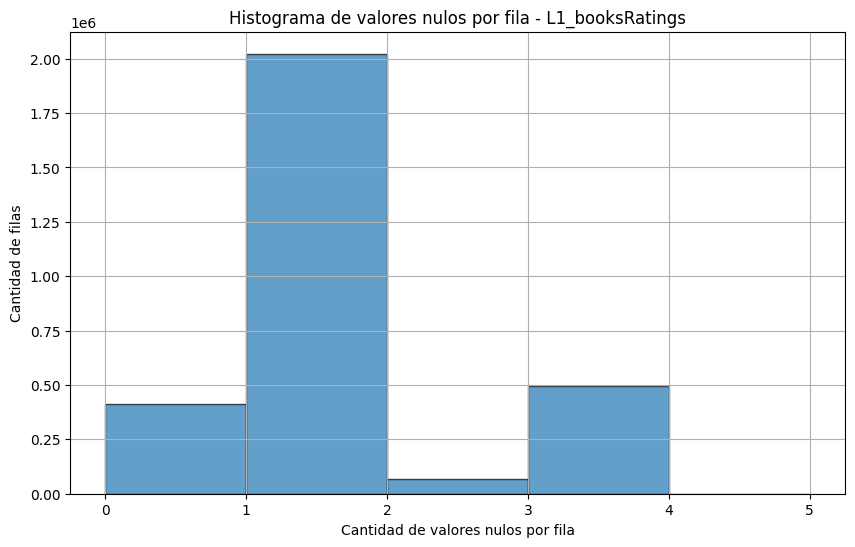

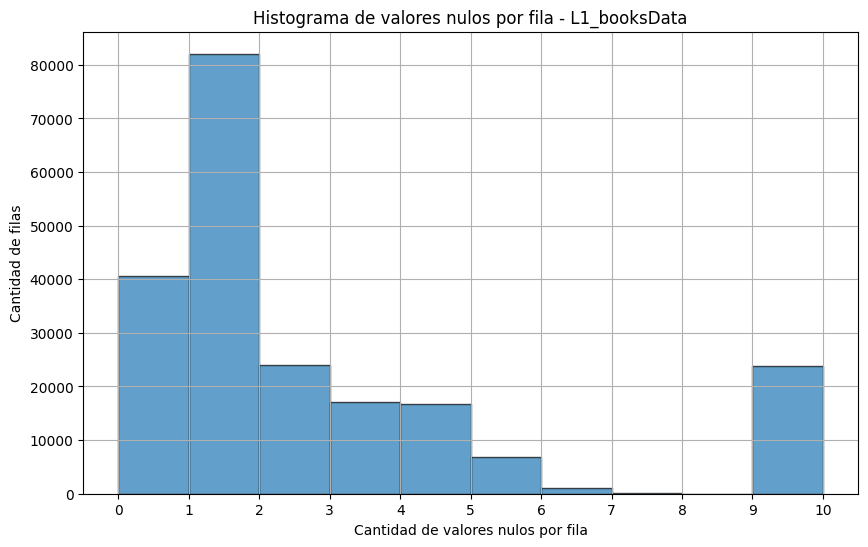

In [19]:
import matplotlib.pyplot as plt

# L1 Datasets
datasets_L1 = {
    'L1_booksRatings': L1_booksRatings,
    'L1_booksData': L1_booksData
}


# Función para generar histogramas
def plot_null_histogram(df, name):
    # Contar valores nulos por fila
    null_counts = df.isnull().sum(axis=1)

    # Crear histograma
    plt.figure(figsize=(10, 6))
    # Histograma de valores nulos por fila
    plt.hist(null_counts, bins=range(0, null_counts.max() + 2), edgecolor='black', alpha=0.7, align='mid')

    # Ajustes de título y etiquetas
    plt.title(f"Histograma de valores nulos por fila - {name}")
    plt.xlabel('Cantidad de valores nulos por fila')
    plt.ylabel('Cantidad de filas')

    # Mostrar solo valores enteros en el eje X
    plt.xticks(range(0, null_counts.max() + 2))

    plt.grid(True)
    plt.show()

# Generar histogramas para L1 Datasets
for name, dataset in datasets_L1.items():
    plot_null_histogram(dataset, name)


### **Conclusiones**

**Conclusiones relevantes de L1**

*Del dataset booksRatings:*

- A priori, L1 tiene 1.008.972 usuarios diferentes, aunque estos podrian no ser todos, sino solo aquellos usuarios que hicieron reviews.

- Id es el id del libro. Hay 221.998 libros diferentes pero solo hay 212.403 titulos diferentes. A priori podria ser que hay nulos en los titulos o que el id funcione como el isbn y que, si un libro tiene dos ediciones diferentes, tendria dos id diferentes, pero el mismo titulo. haciendo que haya mas id que titulos.

- Los puntajes van de 0 a 5 segun la documentación, pero en los datos nadie califico como 0.

*Del dataset booksData:*
- Los libros no tienen Id, se identifican por el titulo. A priori tienen 212.403 libros diferentes.

*De ambos datasets:*
- Si consideramos la columna ratingscount de booksData, deberian haber 1057378 ratings, pero la base de booksRatings contiene 3.000.000 de ratings/reviews. a priori hay una incongruencia.
- La cantidad de titulos de libros diferentes entre ambos datasets es la misma, lo cual es razonabl.

## **Análisis de L2**

###Valores y características

In [21]:
display(L2_books.nunique())

,0
ISBN,271379
Book-Title,242154
Book-Author,102026
Year-Of-Publication,116
Publisher,16806
Image-URL-S,271063
Image-URL-M,271063
Image-URL-L,271063


In [22]:
display(L2_ratings.nunique())

,0
User-ID,105283
ISBN,340556
Book-Rating,11


Es raro que la cantidad de valores unicos en Book Rating sea 11, a menos que sea de 0 a 10. Voy a revisar:

In [23]:
print(np.sort(L2_ratings.loc[:,"Book-Rating"].unique()))

[ 0  1  2  3  4  5  6  7  8  9 10]


In [24]:
display(L2_users.nunique())

,0
User-ID,278858
Location,57339
Age,165


###Nulos

In [25]:
# Cantidad de nulos por columna para cada dataset de L2
print("Cantidad de valores nulos en L2_books:")
print(L2_books.isnull().sum())

print("\nCantidad de valores nulos en L2_ratings:")
print(L2_ratings.isnull().sum())

print("\nCantidad de valores nulos en L2_users:")
print(L2_users.isnull().sum())

Cantidad de valores nulos en L2_books:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Cantidad de valores nulos en L2_ratings:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Cantidad de valores nulos en L2_users:
User-ID          0
Location         0
Age         110762
dtype: int64


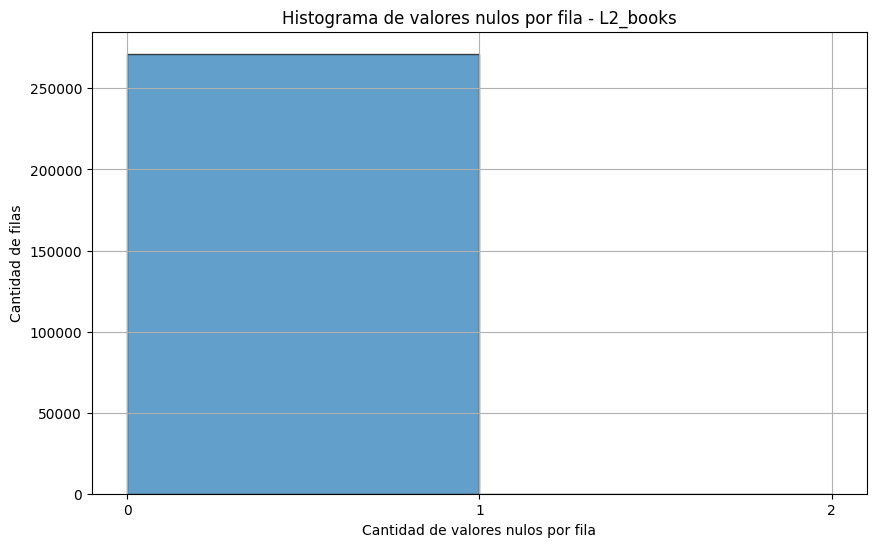

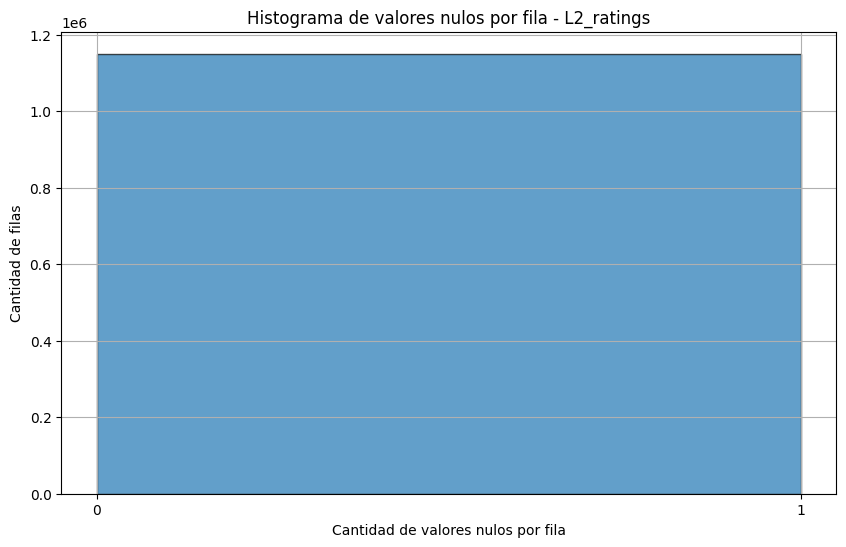

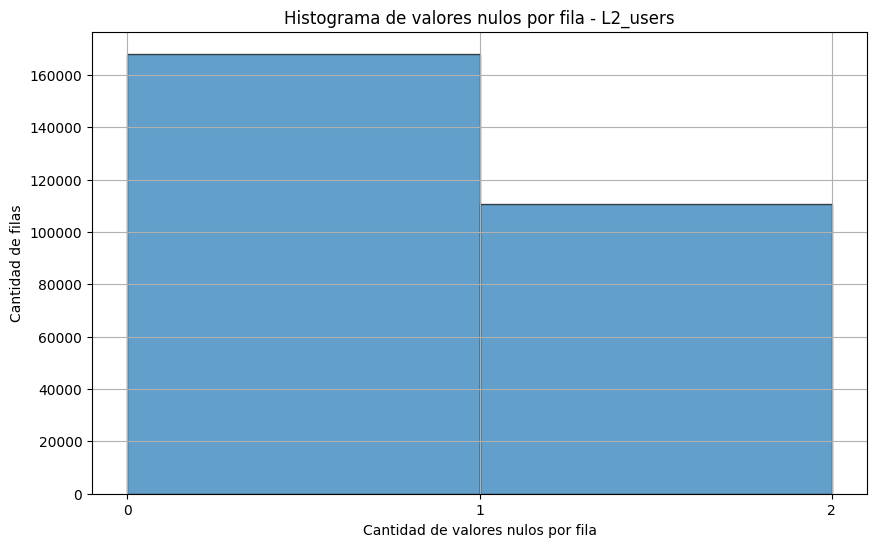

In [26]:

# L2 Datasets
datasets_L2 = {
    'L2_books': L2_books,
    'L2_ratings': L2_ratings,
    'L2_users': L2_users
}

# Generar histogramas para L2 Datasets
for name, dataset in datasets_L2.items():
    plot_null_histogram(dataset, name)

### **Conclusiones**

- Los puntajes de los ratings van de 0 a 10
- La caracteristica con mayor cantidad de nulos es la edad en la base de users. El resto no tienen casi nulos.
- No todos los Users han hecho reviews.
- En la base de books figuran 271.379 ISBN distintos, pero se han hecho reviews sobre 340.556 ISBN diferentes.

## **Entendiendo los ISBN y los Id:**

Tengo entendido que una misma obra puede tener varios ISBN, ya que estos son unicos para cada edición del libro (tambien depende de quien lo publica).


Voy a confirmar esto:

### Pruebas

En los datos de L2:

In [27]:
countsL2 = L2_books.groupby("Book-Title")["ISBN"].count()
display(countsL2.describe())

,ISBN
count,242154.000000
mean,1.120688
std,0.523679
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,27.000000


In [28]:
print(countsL2.idxmax())

Selected Poems


In [29]:
LibrosSelectedPoems = L2_books[L2_books["Book-Title"]=="Selected Poems"]

In [30]:
display(LibrosSelectedPoems.head(100))

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39417,0811201465,Selected Poems,K. Patchen,1957,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41317,0679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106890,0060931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118780,0517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...
127468,0520012984,Selected Poems,Paul Verlaine,1970,University of California Press,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...,http://images.amazon.com/images/P/0520012984.0...
156902,0871401541,Selected Poems,E. E. Cummings,1994,Liveright Publishing Corporation,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...,http://images.amazon.com/images/P/0871401541.0...
158321,0060909897,Selected Poems,Gwendolyn Brooks,1963,Harpercollins,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...,http://images.amazon.com/images/P/0060909897.0...
175611,0571050190,Selected Poems,T. T Gunn,1962,Farrar Straus &amp; Giroux,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...,http://images.amazon.com/images/P/0571050190.0...
183918,1550651498,Selected Poems,Ralph Gustafson,2001,Vehicule Press,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...,http://images.amazon.com/images/P/1550651498.0...


In [31]:
display(print(LibrosSelectedPoems["ISBN"].unique()))

['081120958X' '0811201465' '0679750800' '0060931744' '0517101548'
 '0520012984' '0871401541' '0060909897' '0571050190' '1550651498'
 '0333516265' '0679430830' '0940262193' '0802151027' '1852240954'
 '0679765654' '0906427851' '0520069358' '0156003961' '0395320461'
 '006093168X' '0679724834' '0394702956' '0811209512' '0670809179'
 '0460871501' '0571210767']


None

En los datos de L1:

In [32]:
countsL1 = L1_booksRatings.groupby("Title")["Id"].nunique()
display(countsL1.describe())

,Id
count,212403.000000
mean,1.045131
std,0.272372
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,14.000000


In [33]:
display(countsL1.idxmax())

'Poems'

In [34]:
LibrosPoems = L1_booksRatings[L1_booksRatings["Title"]=="Poems"]

In [35]:
display(LibrosPoems.head(100))

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
40221,B0006E8QBU,Poems,NaN,A2CPT04DPD2KKC,"Judy Matthews ""ikanu""",6/7,5.0,946425600,Poems by James Russell Lowell,The poetry in this book covers the full spectr...
104797,1852244925,Poems,NaN,A2I6V7JNUR85MQ,"N. Dorward ""obsessive reviewer""",14/15,5.0,961545600,A major poet,It's hard to know how to review this book: Pry...
104798,1852244925,Poems,NaN,A2PMCVAQC09I51,"""lexo-2x""",15/17,5.0,956880000,Do ya like good music?,I personally think that being a lyric poet is ...
104799,1852244925,Poems,NaN,A14OJS0VWMOSWO,Midwest Book Review,1/3,5.0,1146528000,A highly recommended read for all dedicated po...,Poems is an inspired and inspirational collect...
104800,1852244925,Poems,NaN,A1JL75766ADDFU,"""k-command""",2/10,5.0,1043625600,blow to the head,Shocking that only two reviews up for this. I ...
438313,B00089AQZW,Poems,NaN,A3VAUFW9EDHXNA,An Avid Reader,0/0,5.0,1134950400,Great eloquence and wisdom,Arnold brings the world into a poetic light of...
627274,1892616017,Poems,12.95,A1G6FK8K9XRWE1,William M. Ramsey,1/1,1.0,1062806400,Perils of Public Poetry,A much finer collection of Harper's verse than...
671318,B00072LB3G,Poems,NaN,A2HQ3MLFYHRRW4,George Wood,2/2,4.0,1218672000,Nikolai Nekrasov- Poems,This critical edition is worth it simply for t...
765530,B000875ERY,Poems,NaN,A154SWAB7NJFFJ,Bruce Graham,61/68,3.0,941328000,Many important poems are missing from this sel...,Caveat emptor: nothing later than 1922 in this...
765531,B000875ERY,Poems,NaN,A10BTZRV6I4M9,ReclusiveRaider,0/1,5.0,1312502400,The Everyman's Eliot!,I am still readin this and very into it. This ...


In [36]:
print(LibrosPoems.Id.unique())

['B0006E8QBU' '1852244925' 'B00089AQZW' '1892616017' 'B00072LB3G'
 'B000875ERY' '0915306433' '091530645X' 'B00087CGMU' '0766145867'
 '1932535004' 'B0007KGFOS' 'B00086B820' '1852246553']


### **Conclusiones**

- Se confirma lo que pensaba de que un libro puede tener varios ISBN.
- Además, por lo que busqué en GoodReads y otros lados, los ID de L1 parece que a veces corresponden al ISBN y a veces al ASIN (Amazon Standard Identification Number).
- Al principio pensaba que estaba mal que un ISBN terminara en X, pero al parecer el ultimo numero es un digito de control y pueden ser digitos del 0 al 9 o una x.
- En la libreria 1, las claves no son los Id, sino los títulos.
